In [1]:
# Imports

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import seaborn as sns # additional plotting
import numpy as np

# Load data

In [2]:
# load data
# Only use Petals for this case
df_iris = pd.read_csv("../../data/Iris.csv")

df_iris.drop(columns=["Id", "SepalWidthCm", "SepalLengthCm"], inplace=True)

# sanity check
df_iris.head()


,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [3]:
# Check data structure and types
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PetalLengthCm  150 non-null    float64
 1   PetalWidthCm   150 non-null    float64
 2   Species        150 non-null    object 
dtypes: float64(2), object(1)
memory usage: 3.6+ KB


# Plot data for a better understanding

Plotting the data leads to a better understanding. The first plot was also used for the start into todays workshop.


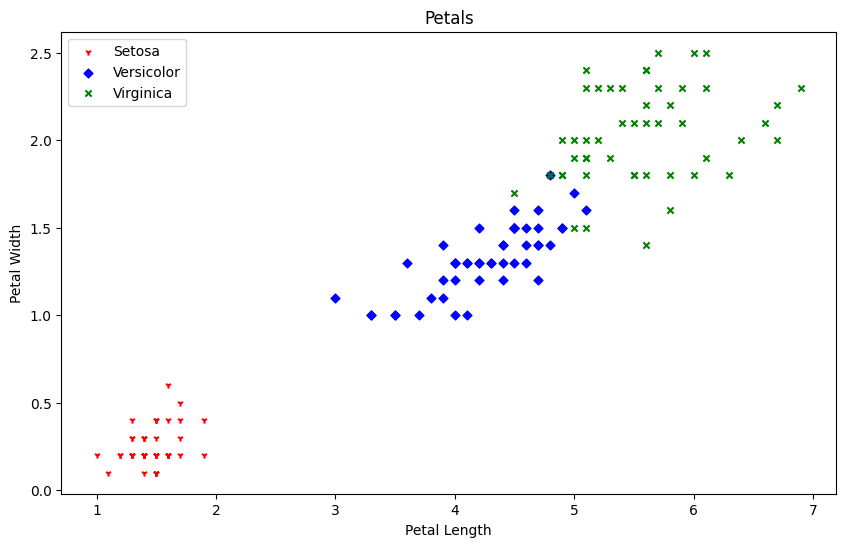

In [4]:
fig = df_iris[df_iris.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='red', label='Setosa', marker = "1")

df_iris[df_iris.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue', label='Versicolor',ax=fig, marker = "D")
df_iris[df_iris.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green', label='Virginica', ax=fig, marker = "x")

fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petals")

fig=plt.gcf()
fig.set_size_inches(10,6)

plt.show()

As seen in the plotted data: The longer the petals, the wider they get. This is not true for the Sepals.
Also there seems to be a strong correlation between Petal size and Sepal length.

Sepal width does not strongly correlate with another feature.

# Prepare the data for training

In [5]:
# importing all the necessary packages to use the classification algorithms

from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy

In [6]:
# split into train and test set
# test_size = 0.2 uses a random sample of 20% as a test set for validation
# control the random state to make results comparable

df_train, df_test = train_test_split(df_iris, test_size = 0.2, random_state=1)

In [7]:
# it is important, to not have the result leak into the dataset. Therefore we split every dataset into X (Features) and Y (result)
df_train_x = df_train[['PetalLengthCm','PetalWidthCm']]
df_train_y = df_train.Species

df_test_x = df_test[['PetalLengthCm','PetalWidthCm']]
df_test_y = df_test.Species

# Train and test

We use a Support Vector Machine (svm) or as this is a classification task a Support Vector Classifier (svc) as it does the same we did in the intro-task. It calculates a line between the classes

For training, we split the data into 2 sets. A training set and a test set. We use the training set to train the algorithm. Then we feed in the test set and observe, how good the model performs.

In [8]:


# Build an instance of the Support Vector Machine
model = svm.SVC(random_state=1, kernel="linear") 
model.fit(df_train_x,df_train_y) # we train the algorithm with the training data (x) and the results (y)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [9]:
# We use the mode
df_prediction=model.predict(df_test_x)
svm_accuracy = metrics.accuracy_score(df_prediction,df_test_y)
svm_accuracy

0.9666666666666667

In [10]:
df_iris.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


Let's plot the Support Vector, the svc uses

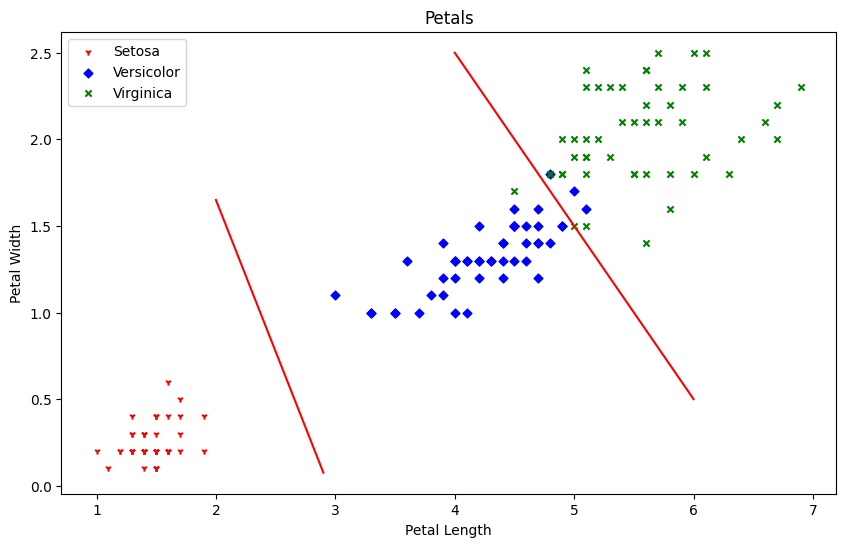

In [11]:
# using the same plot from above

fig = df_iris[df_iris.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='red', label='Setosa', marker = "1")

df_iris[df_iris.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue', label='Versicolor',ax=fig, marker = "D")
df_iris[df_iris.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green', label='Virginica', ax=fig, marker = "x")

fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petals")

fig=plt.gcf()
fig.set_size_inches(10, 6)

# Add line between setosa and versicolor 
w1 = model.coef_[0]
b1 = model.intercept_[0]      # b consists of 1 element
x_points1 = np.linspace(2,2.9)    # generating x-points
y_points1 = -(w1[0] / w1[1]) * x_points1 - b1 / w1[1]  # adding y-values for each x
plt.plot(x_points1, y_points1, c='r')

# Add line between versicolor and virginica
w2 = model.coef_[2]
b2 = model.intercept_[2]      # b consists of 1 element
x_points2 = np.linspace(4, 6)    # generating x-points
y_points2 = -(w2[0] / w2[1]) * x_points2 - b2 / w2[1]  # adding y-values for each x
plt.plot(x_points2, y_points2, c='r')
